In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/datasets/trainset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/11/00011_00025_00013.png  
  inflating: Train/11/00011_00025_00014.png  
  inflating: Train/11/00011_00025_00015.png  
  inflating: Train/11/00011_00025_00016.png  
  inflating: Train/11/00011_00025_00017.png  
  inflating: Train/11/00011_00025_00018.png  
  inflating: Train/11/00011_00025_00019.png  
  inflating: Train/11/00011_00025_00020.png  
  inflating: Train/11/00011_00025_00021.png  
  inflating: Train/11/00011_00025_00022.png  
  inflating: Train/11/00011_00025_00023.png  
  inflating: Train/11/00011_00025_00024.png  
  inflating: Train/11/00011_00025_00025.png  
  inflating: Train/11/00011_00025_00026.png  
  inflating: Train/11/00011_00025_00027.png  
  inflating: Train/11/00011_00025_00028.png  
  inflating: Train/11/00011_00025_00029.png  
  inflating: Train/11/00011_00026_00000.png  
  inflating: Train/11/00011_00026_00001.png  
  inflating: Train/11/00011_00026_00002.png  
  inflating: Train/11/00011_0

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [7]:
imgs_path = r"/content/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    z=str(i)
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path+'/'+img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


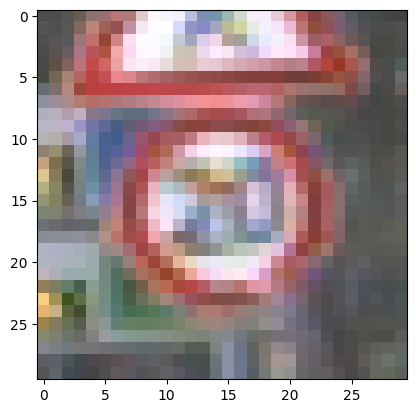

In [8]:
img = Image.open(r"/content/Train/0/00000_00000_00000.png")
img = img.resize((30, 30))
sr = np.array(img)
plt.imshow(img)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
#print(y_train)
#print(y_test[0])
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
26


In [10]:
#print(y_train)
print(x_train[0])

[[[126 106 100]
  [ 75  62  58]
  [ 51  45  41]
  ...
  [ 11  11  11]
  [ 12  10  11]
  [ 12   9   9]]

 [[100  86  78]
  [ 55  45  41]
  [ 30  30  27]
  ...
  [ 11  10  10]
  [ 11  11  11]
  [ 12  10  10]]

 [[ 83  74  66]
  [ 52  44  38]
  [ 30  24  22]
  ...
  [ 11  10  10]
  [ 10  10  10]
  [ 10  10  11]]

 ...

 [[ 33  29  29]
  [ 31  27  25]
  [ 26  25  20]
  ...
  [ 21  19  16]
  [ 26  24  18]
  [ 31  26  18]]

 [[ 30  28  26]
  [ 29  27  25]
  [ 27  26  22]
  ...
  [ 25  24  19]
  [ 39  37  27]
  [ 37  33  24]]

 [[ 28  25  25]
  [ 27  26  25]
  [ 27  26  23]
  ...
  [ 33  30  24]
  [ 34  29  20]
  [ 25  20  12]]]


In [11]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [12]:
print(x_train.shape[1:])

(30, 30, 3)


In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
epochs = 16
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/16
491/491 [==============================] - 146s 292ms/step - loss: 2.2546 - accuracy: 0.4646 - val_loss: 0.7766 - val_accuracy: 0.7997
Epoch 2/16
491/491 [==============================] - 143s 291ms/step - loss: 0.7194 - accuracy: 0.7905 - val_loss: 0.2280 - val_accuracy: 0.9406
Epoch 3/16
491/491 [==============================] - 142s 290ms/step - loss: 0.4393 - accuracy: 0.8691 - val_loss: 0.1624 - val_accuracy: 0.9591
Epoch 4/16
491/491 [==============================] - 139s 283ms/step - loss: 0.3090 - accuracy: 0.9115 - val_loss: 0.1118 - val_accuracy: 0.9705
Epoch 5/16
491/491 [==============================] - 134s 273ms/step - loss: 0.2420 - accuracy: 0.9296 - val_loss: 0.0663 - val_accuracy: 0.9832
Epoch 6/16
491/491 [==============================] - 139s 284ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 7/16
491/491 [==============================] - 137s 280ms/step - loss: 0.1967 - accuracy: 0.9431 - val_loss: 0.0501 -

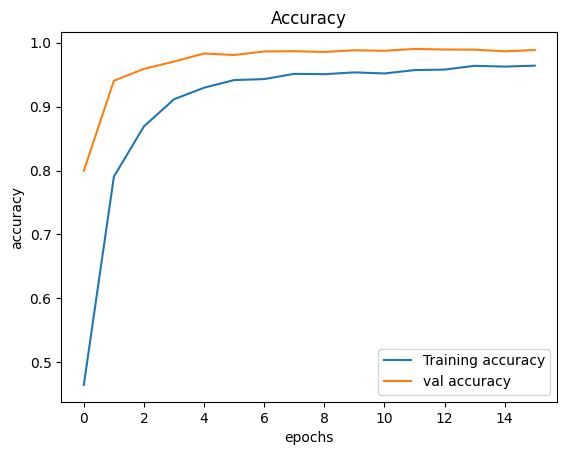

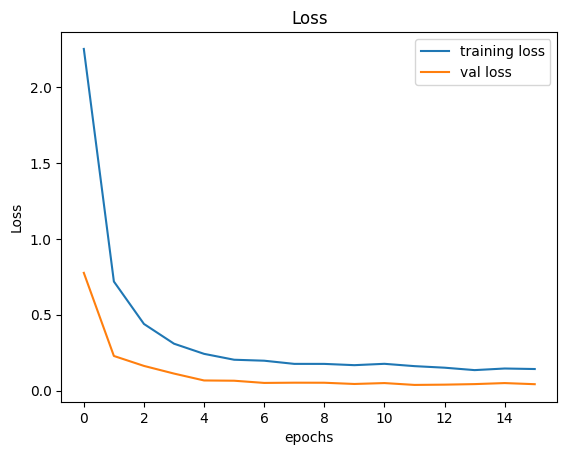

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [19]:
import streamlit as st
model = joblib.load('model.pkl')

In [ ]:
model.save('traffic_classifier.h5')